In [47]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [48]:
df = pd.read_excel(r'C:\Users\vs255033\Downloads\CaseStudy_20190517.xlsx')

In [49]:
df.sample(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
23184,18268446,4.369448,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,2017-09-20,40.711728,-73.949550,Sunny Modern Room with a Balcony and Amazing View,Williamsburg,45,100.0,11206,1.0,1.0
20396,17206399,4.787492,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,True,...,NaT,34.063240,-118.297514,Mid Wilshire Private Rm Grand Open!,NaN,0,NaN,90005,1.0,2.0
34061,15868258,6.396930,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,3.0,Real Bed,strict,True,...,2017-04-16,34.166157,-118.080996,MidCentury Dream House in Pasadena,Pasadena,13,97.0,91107,4.0,4.0
35995,13533471,3.891820,Apartment,Private room,"{""Air conditioning"",Kitchen,Essentials,""Hair d...",2,1.0,Real Bed,strict,True,...,NaT,40.754013,-73.920132,â¤ï¸A sweet room near Manhattanâ¤ï¸,Astoria,0,NaN,11101,1.0,1.0
8126,149287,6.214608,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,3.5,Real Bed,strict,True,...,2015-07-26,34.114615,-118.295213,"Los Feliz, 1 YEAR RENTAL 3BD/3.5BA",Hollywood Hills,2,100.0,90027,3.0,3.0


In [50]:
df.isnull().sum()

id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 138
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                21
first_review             8231
host_has_profile_pic      127
host_response_rate      11128
host_since                127
instant_bookable            0
last_review              8206
latitude                    0
longitude                   0
name                        1
neighbourhood            3281
number_of_reviews           0
review_scores_rating     8715
zipcode                   524
bedrooms                   55
beds                       72
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36795 entries, 0 to 36794
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36795 non-null  int64         
 1   log_price             36795 non-null  float64       
 2   property_type         36795 non-null  object        
 3   room_type             36795 non-null  object        
 4   amenities             36795 non-null  object        
 5   accommodates          36795 non-null  int64         
 6   bathrooms             36657 non-null  float64       
 7   bed_type              36795 non-null  object        
 8   cancellation_policy   36795 non-null  object        
 9   cleaning_fee          36795 non-null  bool          
 10  city                  36795 non-null  object        
 11  description           36774 non-null  object        
 12  first_review          28564 non-null  datetime64[ns]
 13  host_has_profile

In [52]:
df.duplicated().sum()

0

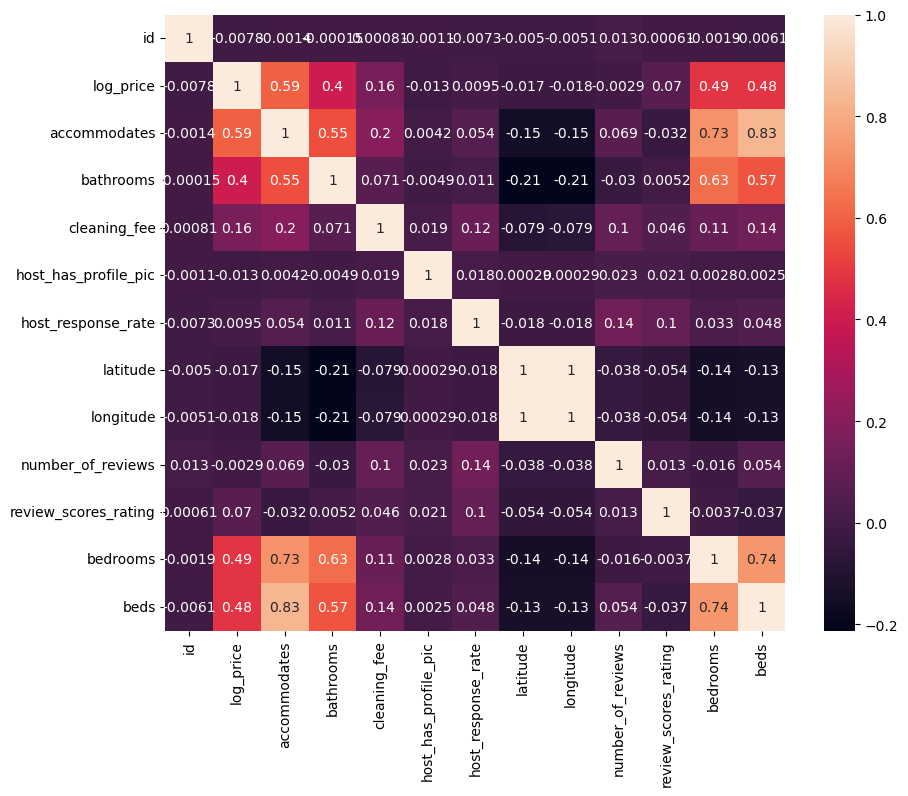

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(),annot=True)
plt.show()

In [54]:
df.drop(columns=['first_review','host_since','last_review','amenities','description','instant_bookable','name','neighbourhood'],axis=1,inplace=True)

In [55]:
df['zipcode'] = df['zipcode'].astype(str)
df['log_price'] = df['log_price'].astype('int')

In [56]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['log_price']),
                                                 df['log_price'],
                                                 test_size=0.2,
                                                random_state=42)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29436 entries, 35054 to 15795
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    29436 non-null  int64  
 1   property_type         29436 non-null  object 
 2   room_type             29436 non-null  object 
 3   accommodates          29436 non-null  int64  
 4   bathrooms             29328 non-null  float64
 5   bed_type              29436 non-null  object 
 6   cancellation_policy   29436 non-null  object 
 7   cleaning_fee          29436 non-null  bool   
 8   city                  29436 non-null  object 
 9   host_has_profile_pic  29338 non-null  float64
 10  host_response_rate    20483 non-null  float64
 11  latitude              29436 non-null  float64
 12  longitude             29436 non-null  float64
 13  number_of_reviews     29436 non-null  int64  
 14  review_scores_rating  22433 non-null  float64
 15  zipcode        

In [58]:
X_train.isnull().sum()

id                         0
property_type              0
room_type                  0
accommodates               0
bathrooms                108
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
host_has_profile_pic      98
host_response_rate      8953
latitude                   0
longitude                  0
number_of_reviews          0
review_scores_rating    7003
zipcode                    0
bedrooms                  46
beds                      57
dtype: int64

In [59]:
# imputation transformer
trf1 = ColumnTransformer([
    ('impute_num',SimpleImputer(strategy='median'),[4,9,10,14,16,17]),
    ('impute_cat',SimpleImputer(strategy='most_frequent'),[15])
],remainder='passthrough')

In [60]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,5,6,7,8,15])
],remainder='passthrough')

In [61]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,504))
])

In [70]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=200)

In [71]:
# train the model
trf5 = DecisionTreeRegressor()

In [72]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [73]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_num',
                                                  SimpleImputer(strategy='median'),
                                                  [4, 9, 10, 14, 16, 17]),
                                                 ('impute_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [15])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 5, 6, 7, 8, 15])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 504, None))])),
                ('trf4',
                 SelectKBest(k=200,
                             score_func=<function chi2 at 0x0000025161308C20>)),
                ('trf5', DecisionTreeRegressor())])

In [74]:
# Predict
y_pred = pipe.predict(X_test)

In [75]:

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse,r2

(0.35708487239809644, 0.3515211784441994)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36795 entries, 0 to 36794
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36795 non-null  int64  
 1   log_price             36795 non-null  int32  
 2   property_type         36795 non-null  object 
 3   room_type             36795 non-null  object 
 4   accommodates          36795 non-null  int64  
 5   bathrooms             36657 non-null  float64
 6   bed_type              36795 non-null  object 
 7   cancellation_policy   36795 non-null  object 
 8   cleaning_fee          36795 non-null  bool   
 9   city                  36795 non-null  object 
 10  host_has_profile_pic  36668 non-null  float64
 11  host_response_rate    25667 non-null  float64
 12  latitude              36795 non-null  float64
 13  longitude             36795 non-null  float64
 14  number_of_reviews     36795 non-null  int64  
 15  review_scores_ratin

In [83]:
pipe.predict(np.array([6901257,'Apartment','Entire home/apt',3,1.0,'Real Bed','strict',True,'NYC',1.0,0,40.696524,-73.991617,2,100.0,'11201',1.0,1.0]).reshape(1, -1))

array([4.44736842])

In [84]:
df.head(1)

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,1.0,NaN,40.696524,-73.991617,2,100.0,11201,1.0,1.0
